# Problem:
  - A house-flipping company would like to identify underpriced homes by comparing asking prices to predicted sale prices.
  - They would like to segment homes into groups to analyze what kinds of homes there are.
  - They would also like a model that predicts the selling price of a home.


Load Libraries

In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Part 1: Clustering instructions:

The house-flipping company would like you to segment the homes sold in the database and create an analytical report on the clusters, describing each cluster and describing how they are different.

In [440]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the data set

In [441]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Intermediate Machine Learning/Belt Exam/option_A_clustering_df - option_A_clustering_df.csv')


## Explore the dataset

In [442]:
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.184194,47.730389


In [443]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4944 non-null   int64  
 1   SqFt1stFloor        4944 non-null   int64  
 2   SqFtHalfFloor       4944 non-null   int64  
 3   SqFt2ndFloor        4944 non-null   int64  
 4   SqFtUpperFloor      4944 non-null   int64  
 5   SqFtTotLiving       4944 non-null   int64  
 6   SqFtTotBasement     4944 non-null   int64  
 7   SqFtFinBasement     4944 non-null   int64  
 8   SqFtGarageBasement  4944 non-null   int64  
 9   SqFtGarageAttached  4944 non-null   int64  
 10  DaylightBasement    4944 non-null   int64  
 11  SqFtOpenPorch       4944 non-null   int64  
 12  SqFtEnclosedPorch   4944 non-null   int64  
 13  SqFtDeck            4944 non-null   int64  
 14  BrickStone          4944 non-null   int64  
 15  Bedrooms            4944 non-null   int64  
 16  BathHa

In [444]:
df.describe()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
count,4.944000e+03,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,...,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000
mean,6.643497e+05,1175.502832,51.758495,349.306837,26.994134,1935.205097,595.065939,334.273463,102.417071,170.282160,...,8.271238,148.908576,4.415858,3.375607,0.387743,0.628236,1.319579,1972.183455,-122.271891,47.572471
std,2.978080e+05,446.398643,174.464172,544.632918,115.331907,764.888792,567.175862,422.825946,187.119944,239.635895,...,37.449815,201.636086,18.643753,0.947061,0.506022,0.651598,0.609963,32.905503,0.086519,0.127187
min,6.000000e+04,260.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,-122.526072,47.213547
25%,4.500000e+05,880.000000,0.000000,0.000000,0.000000,1390.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1952.000000,-122.346573,47.488749
50%,6.305500e+05,1170.000000,0.000000,0.000000,0.000000,1770.000000,560.000000,110.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1967.000000,-122.291976,47.576939
75%,7.886125e+05,1450.000000,0.000000,580.000000,0.000000,2360.000000,1070.000000,570.000000,190.000000,400.000000,...,0.000000,257.000000,0.000000,4.000000,1.000000,1.000000,2.000000,2016.000000,-122.192528,47.681099
max,1.998000e+06,3600.000000,2000.000000,3010.000000,1220.000000,6695.000000,3070.000000,2620.000000,1090.000000,1830.000000,...,620.000000,1940.000000,100.000000,8.000000,3.000000,4.000000,5.000000,2019.000000,-122.090088,47.777422


Check for duplicates

In [445]:
df[df.duplicated()]

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
388,684950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.157389,47.436197
392,649950,390,0,390,0,1160,380,380,0,0,...,0,310,0,2,0,1,1,2018,-122.348471,47.657429
1036,659950,430,0,430,0,1290,690,430,260,0,...,0,320,0,3,0,1,1,2018,-122.376441,47.684154
1164,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.156684,47.437557
1292,599000,380,0,380,0,1100,340,340,0,0,...,0,0,0,2,0,2,0,2017,-122.306370,47.599993
1442,720000,590,0,590,0,1580,570,400,170,0,...,80,500,0,3,1,0,2,2017,-122.298524,47.595799
1590,650000,410,0,410,290,1440,330,330,0,0,...,0,130,0,2,0,1,1,2018,-122.372316,47.565822
1722,449950,360,0,360,230,950,0,0,0,0,...,0,0,0,2,0,0,1,2018,-122.313239,47.552161
2077,699950,511,511,511,511,1535,0,0,0,0,...,0,0,0,0,0,0,0,2018,-122.377062,47.686520
2212,819880,570,0,780,0,1630,690,280,410,0,...,0,0,0,4,1,1,2,2019,-122.305288,47.690831


drop the duplicated rows

In [446]:
df = df.drop_duplicates()

## Check for missing values

In [447]:
print(df.isnull().sum())

SalePrice             0
SqFt1stFloor          0
SqFtHalfFloor         0
SqFt2ndFloor          0
SqFtUpperFloor        0
SqFtTotLiving         0
SqFtTotBasement       0
SqFtFinBasement       0
SqFtGarageBasement    0
SqFtGarageAttached    0
DaylightBasement      0
SqFtOpenPorch         0
SqFtEnclosedPorch     0
SqFtDeck              0
BrickStone            0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
YrBuilt               0
Longitude             0
Latitude              0
dtype: int64


## Visualize some of the features to identify anomalies

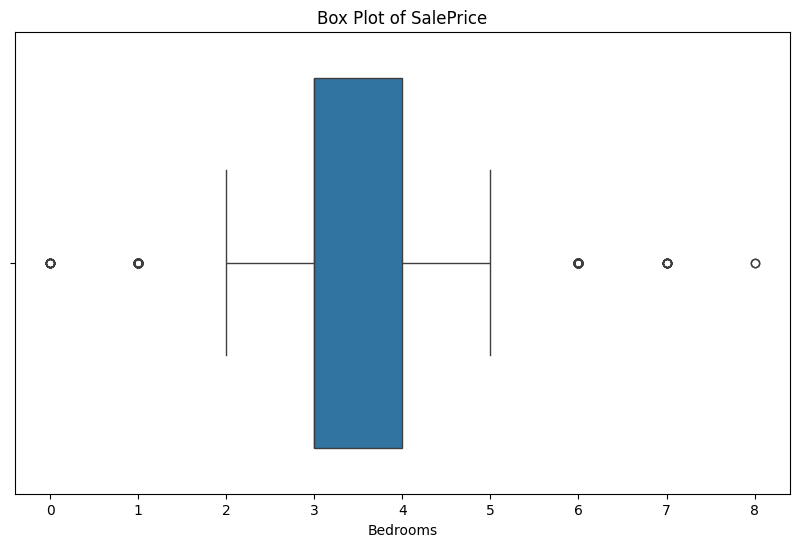

In [448]:
# Example: Plotting a box plot for 'SalePrice'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Bedrooms'])
plt.title('Box Plot of SalePrice')
plt.show()

In [449]:
df.columns

Index(['SalePrice', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'BrickStone',
       'Bedrooms', 'BathHalfCount', 'Bath3qtrCount', 'BathFullCount',
       'YrBuilt', 'Longitude', 'Latitude'],
      dtype='object')

In [450]:
import pandas as pd

# List of columns to check for outliers
# columns_to_check = ['SalePrice', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor', 'SqFtUpperFloor',
#                     'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement', 'SqFtGarageBasement',
#                     'SqFtGarageAttached','Bedrooms']
columns_to_check = df.columns
# Calculate IQR and bounds for each column
bounds = {}
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    bounds[column] = (lower_bound, upper_bound)

# Filter out rows with outliers in any of the specified columns
mask = pd.Series(True, index=df.index)
for column, (lower, upper) in bounds.items():
    mask &= (df[column] >= lower) & (df[column] <= upper)

df = df[mask]


Comfirming for any outliers

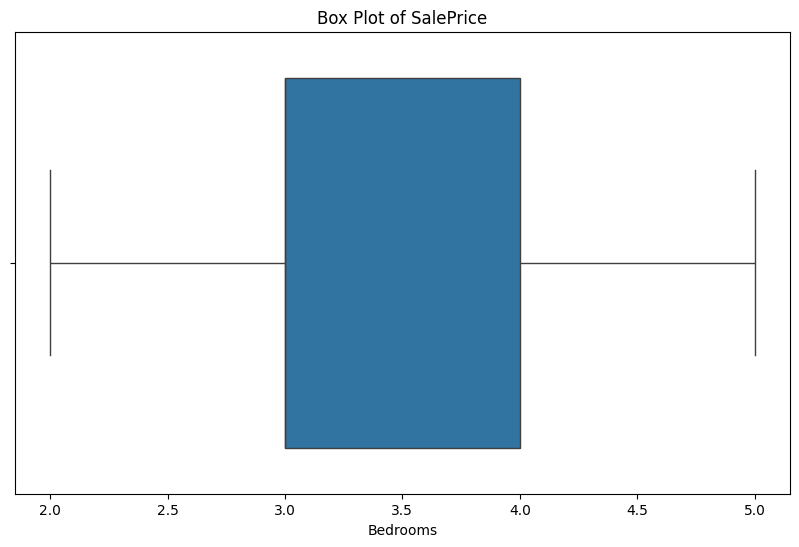

In [451]:
# Example: Plotting a box plot for 'SalePrice'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Bedrooms'])
plt.title('Box Plot of SalePrice')
plt.show()

entries with 0 bedrooms

In [452]:
zero_bedrooms = df[df['Bedrooms'] == 0]
zero_bedrooms

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude


# Prepare the Data for Clustering

##  Scale the numerical features


In [453]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)

# Use KMeans for Clustering

## Use an elbow plot and silhouette score to find the optimal number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

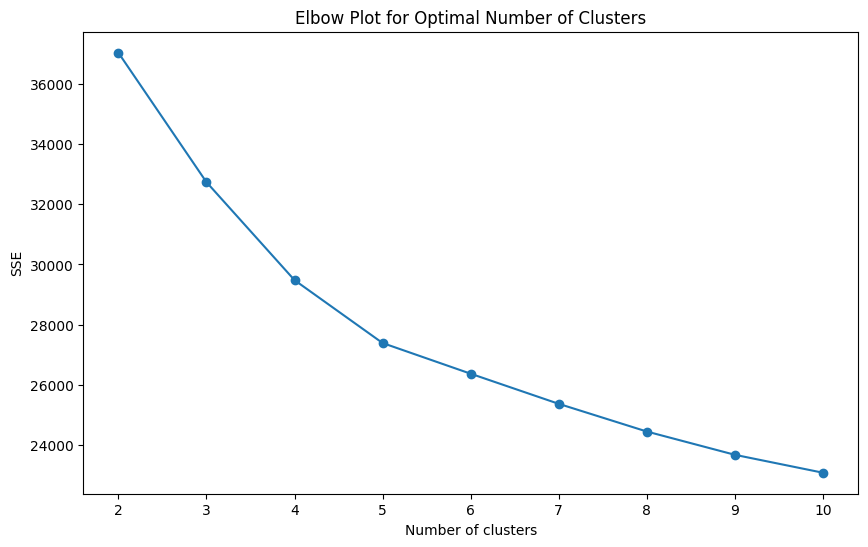

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

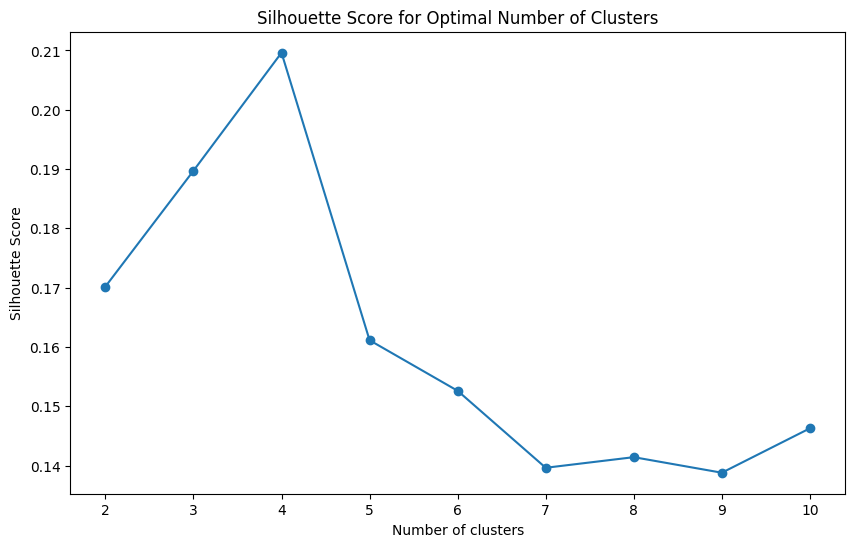

In [454]:
# Elbow plot to determine the optimal number of clusters
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.show()

# Calculate silhouette scores for different cluster numbers
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()




from the two plots, the elbow plot and the silhouette plot, we note that the elbow shows a noticable bend at 4 clusters, showing that increasing the number of clusters beyond 4 will result in dimishing results, the silhoutte score plot indicates the highest silhoutte scores at 4 clusters indicating its the optimal number of clusters , we will go with 4 clusters

In [455]:
# Choose the optimal number of clusters (based on elbow plot and silhouette score)
optimal_clusters = 4

# Fit the KMeans model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Analyze and Report on the Clusters

## Describe each cluster and create visualizations.

In [456]:
# Group by cluster and get the mean values
cluster_description = df.groupby('Cluster').mean()
cluster_description

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
Cluster,,,,,,,,,,,,,,,,,,,,,
0,667221.131646,570.101266,0.0,550.746835,0.0,1499.911392,530.815190,379.063291,147.139241,0.734177,...,0.0,241.455696,0.0,2.792405,0.539241,1.025316,1.210127,2016.177215,-122.323985,47.624659
1,471257.760589,1229.135359,0.0,42.307551,0.0,1326.249540,250.359116,56.510129,19.493554,179.729282,...,0.0,56.866483,0.0,2.917127,0.165746,0.274401,1.066298,1951.788214,-122.273589,47.539921
2,622526.125731,1310.083333,0.0,22.821637,0.0,2090.074561,1117.388889,757.169591,143.383041,164.233918,...,0.0,173.951754,0.0,3.710526,0.342105,0.884503,1.232456,1964.119883,-122.249269,47.575116
3,673312.000000,1145.956954,0.0,1024.165563,0.0,2306.099338,228.195364,135.976821,33.079470,370.473510,...,0.0,96.950331,0.0,3.864238,0.821192,0.417219,1.754967,1988.195364,-122.242110,47.544692


## Visualisation 1

<ipython-input-457-24a197329aa8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='SalePrice', palette='Set1')


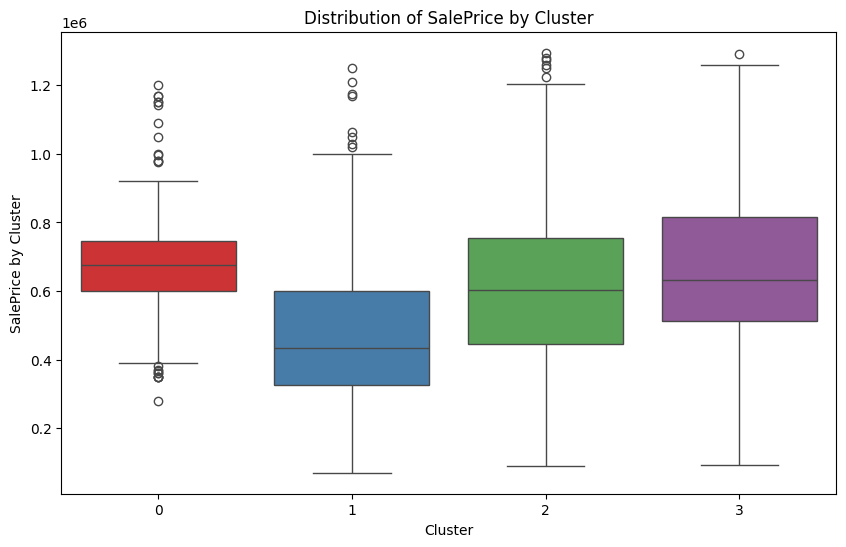

In [457]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='SalePrice', palette='Set1')
plt.title('Distribution of SalePrice by Cluster')
plt.xlabel('Cluster')
plt.ylabel('SalePrice by Cluster')
plt.show()



### Interpretation:
SalePrice Distribution by Cluster:

  - Median SalePrice: Cluster 0 has the highest median sale price, indicating that homes in this cluster are generally more expensive and cluster 1 having the lowest implying it has the least expensive homes
  - Spread and IQR: Cluster 1 shows a wider IQR(Inter Quatile range), suggesting more variability in sale prices within this cluster.
  - Outliers: Cluster 2 has several high-value outliers, which could be luxury homes or properties in premium locations. but also a wide IQR

**Conclusion:**

Cluster 0 and Cluster 3 represent higher-priced homes, while Cluster 1 represents lower-priced homes. Cluster 1 and Cluster 2 fall in between with cluster 2 being higher than cluster 1 , both having a wide spread IQR

## Visualization 2:

<ipython-input-458-ed89034bd8d3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Cluster', y='SalePrice', palette='Set1', ci=None)
<ipython-input-458-ed89034bd8d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y='SalePrice', palette='Set1', ci=None)


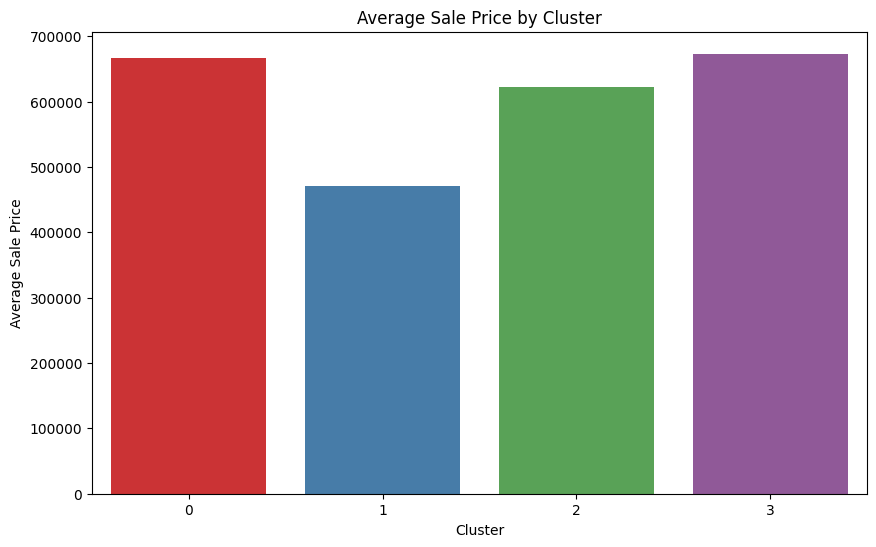

In [458]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Cluster', y='SalePrice', palette='Set1', ci=None)
plt.title('Average Sale Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Sale Price')
plt.show()


### Interpretation
  - Cluster 0:

This cluster has homes with the highest value. Factors contributing to this could include larger square footage, newer construction, more desirable locations, or other premium features.
  - Cluster 1:

Homes in this cluster are the least expensive on average. These might be older homes, smaller homes, or homes in less desirable locations.
  - Cluster 2:

This cluster represents homes that are relatively expensive but not as much as those in Cluster 0. These homes might have a good combination of desirable features but lack some of the high-end characteristics of Cluster 0.
- Cluster 3:

The homes here have a moderate sale price, suggesting they are mid-range in terms of features and desirability.

## Bedrooms by Cluster
This visualization will show the distribution of the number of bedrooms across different clusters.

<ipython-input-459-677b9bd72b7f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Bedrooms', palette='Set1')


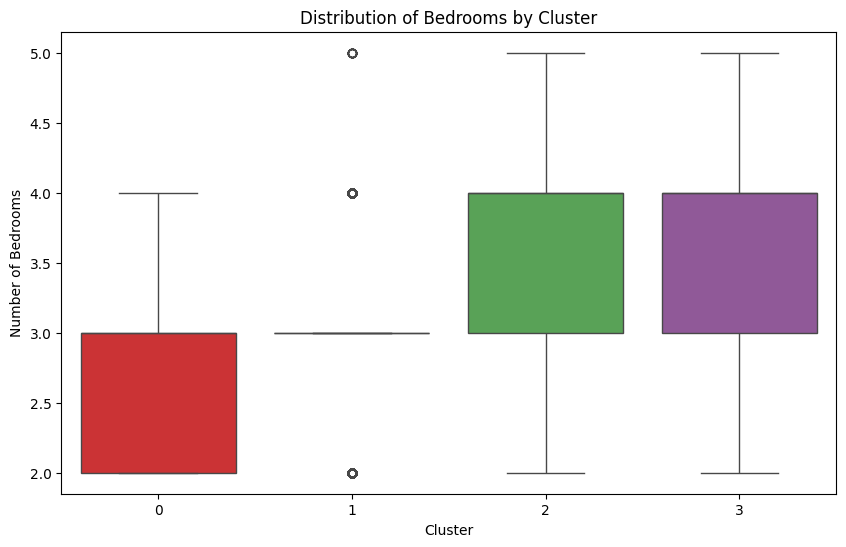

In [459]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='Bedrooms', palette='Set1')
plt.title('Distribution of Bedrooms by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Bedrooms')
plt.show()


  - Cluster 0: Homes in Cluster 0 generally have fewer bedrooms, with both the lower (Q1) and upper (Q3) quartiles being the lowest among all clusters. This suggests that Cluster 0 consists of homes with smaller sizes or fewer bedrooms.
  - Cluster 1: All homes in Cluster 1 have an identical number of bedrooms, which is more than most homes in Cluster 0 but less than those in Clusters 2 and 3. This indicates that Cluster 1 is very homogenous in terms of the number of bedrooms.
  - Cluster 2 and Cluster 3: Homes in these clusters have a higher number of bedrooms overall, with their lower quartiles (Q1) being at the same level as the upper quartile (Q3) of Cluster 1. This suggests that Clusters 2 and 3 consist of larger homes with more bedrooms, indicating a higher-end market segment.

## Visualisation 3


BrickStone by Cluster
Interpretation:

  - Cluster 0:
This cluster shows a high median value of BrickStone, indicating a significant presence of brick or stone materials in homes.
There are several high outliers, indicating some homes with a very high amount of BrickStone.
  - Clusters 1, 2, 3, and 4:
These clusters show very low median values of BrickStone, indicating minimal use of brick or stone materials.
There are a few outliers, but they are not as high as in Cluster 0.

  - Conclusion:

Cluster 0 stands out with a significant use of brick or stone materials in homes, which might contribute to the higher SalePrice observed in this cluster.
Clusters 1, 2, 3, and 4 have minimal use of BrickStone, which could be one of the factors leading to lower SalePrice compared to Cluster 0.

 Scatter Plot: SalePrice vs. SqFtTotLiving
This visualization will show how the clusters differ in terms of property price and total living area.

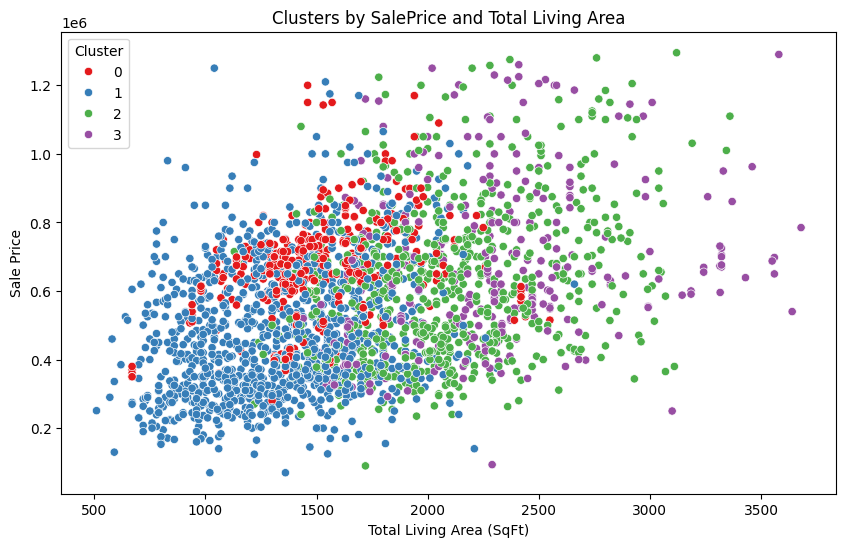

In [460]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SqFtTotLiving', y='SalePrice', hue='Cluster', palette='Set1')
plt.title('Clusters by SalePrice and Total Living Area')
plt.xlabel('Total Living Area (SqFt)')
plt.ylabel('Sale Price')
plt.show()


# General Summary

From the analysis of these visualizations:

  - Cluster 0: Characterized by high SalePrice and significant use of brick or stone materials.
  - Cluster 1: Homes have moderate SalePrice with minimal use of brick or stone.
  - Cluster 2: Represents the lowest SalePrice with minimal use of brick or stone.
  - Cluster 3: Moderate SalePrice with minimal use of brick or stone.


# PART 2 Modeling

# Load the data

In [461]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Intermediate Machine Learning/Belt Exam/option_A_modeling_df - option_A_modeling_df.csv')

# Explore the Dataset

In [462]:
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,...,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,0,0,1,0,0,1,0,0,0


In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Columns: 171 entries, SalePrice to YearSold_2020
dtypes: float64(2), int64(169)
memory usage: 6.4 MB


In [464]:
df.isnull().sum().sum()

0

In [465]:
df.duplicated().sum()

0

# Preprocessing the Data

define x and y

In [466]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [467]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [468]:
X_scaled.shape

(4937, 170)

In [469]:
y.shape

(4937,)

Train-Test Split

In [470]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


shape of the training and testing sets

In [471]:
X_train.shape, X_test.shape

((3949, 170), (988, 170))

In [472]:
y_train.shape, y_test.shape

((3949,), (988,))

# PCA for Dimensionality Reduction

In [473]:
from sklearn.decomposition import PCA

## Initialize PCA with a chosen number of components

In [474]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

shape of the training and testing sets after PCA

In [475]:
X_train_pca.shape, X_test_pca.shape

((3949, 50), (988, 50))

# Building the Deep Learning Models

create three different versions of a sequential model. Each new model will be an iteration of the previous one.

## Model 1: Basic Model

Basic Model

Initially, a basic sequential model was constructed with a few layers and nodes to establish a baseline performance.
This model served as a starting point to understand the data and the model's ability to learn from it.

In [476]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Initialize the first model 1

In [477]:

model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

### Compile the model 1

In [478]:
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

### Train the model

In [479]:
history1 = model1.fit(X_train_pca, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
99/99 [==============================] - 1s 5ms/step - loss: 527887499264.0000 - mae: 664313.2500 - val_loss: 550159843328.0000 - val_mae: 671202.0000
Epoch 2/50
99/99 [==============================] - 0s 3ms/step - loss: 527797714944.0000 - mae: 664252.1875 - val_loss: 549987614720.0000 - val_mae: 671087.6875
Epoch 3/50
99/99 [==============================] - 0s 3ms/step - loss: 527487041536.0000 - mae: 664046.5000 - val_loss: 549500977152.0000 - val_mae: 670777.6875
Epoch 4/50
99/99 [==============================] - 0s 3ms/step - loss: 526771879936.0000 - mae: 663594.0625 - val_loss: 548528750592.0000 - val_mae: 670173.4375
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 525476167680.0000 - mae: 662785.8125 - val_loss: 546882453504.0000 - val_mae: 669170.5000
Epoch 6/50
99/99 [==============================] - 0s 3ms/step - loss: 523460345856.0000 - mae: 661537.1875 - val_loss: 544447070208.0000 - val_mae: 667704.5625
Epoch 7/50
99/99 [==========

## Mode 2 Adding Dropout for Regularization




Adding Dropout for Regularization

Dropout regularization was added to mitigate overfitting by randomly dropping out a fraction of units during training.
The goal was to improve the generalization of the model by reducing the reliance on specific neurons.
Dropout helps prevent complex co-adaptations in neurons, making the model more robust and less likely to overfit.

In [480]:
from tensorflow.keras.layers import Dropout

### Initialize  model 2

In [481]:
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

### Compile the model 2

In [482]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

Train the model 2

In [483]:
history2 = model2.fit(X_train_pca, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
99/99 [==============================] - 1s 5ms/step - loss: 527888187392.0000 - mae: 664314.1250 - val_loss: 550162857984.0000 - val_mae: 671203.8750
Epoch 2/50
99/99 [==============================] - 0s 3ms/step - loss: 527807250432.0000 - mae: 664258.8125 - val_loss: 550015467520.0000 - val_mae: 671105.3125
Epoch 3/50
99/99 [==============================] - 0s 3ms/step - loss: 527549693952.0000 - mae: 664088.3750 - val_loss: 549624840192.0000 - val_mae: 670853.5625
Epoch 4/50
99/99 [==============================] - 0s 3ms/step - loss: 526969896960.0000 - mae: 663715.8125 - val_loss: 548844109824.0000 - val_mae: 670365.1875
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 525940228096.0000 - mae: 663071.5000 - val_loss: 547559243776.0000 - val_mae: 669574.0625
Epoch 6/50
99/99 [==============================] - 0s 3ms/step - loss: 524328697856.0000 - mae: 662065.8125 - val_loss: 545632190464.0000 - val_mae: 668402.8125
Epoch 7/50
99/99 [==========

## Model 3 Adding More Layers and Nodes

Adding More Layers and Nodes

In Model 3, additional layers and nodes were introduced to increase the model's complexity and capacity to learn intricate patterns in the data.
By adding more layers and nodes, the model gains more representational power, allowing it to capture more nuanced relationships between the features and the target variable.
This expansion of the model architecture aimed to improve the model's ability to capture the underlying structure of the data and make more accurate predictions.

### Initialize model 3

In [484]:
model3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

### Compile model 3

In [485]:
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

### Train model 3

In [486]:
history3 = model3.fit(X_train_pca, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
99/99 [==============================] - 1s 5ms/step - loss: 527810002944.0000 - mae: 664258.7500 - val_loss: 549771935744.0000 - val_mae: 670929.8750
Epoch 2/50
99/99 [==============================] - 0s 3ms/step - loss: 525164445696.0000 - mae: 662475.5625 - val_loss: 542753423360.0000 - val_mae: 666279.0000
Epoch 3/50
99/99 [==============================] - 0s 3ms/step - loss: 507000356864.0000 - mae: 650514.8750 - val_loss: 508640133120.0000 - val_mae: 644121.9375
Epoch 4/50
99/99 [==============================] - 0s 3ms/step - loss: 447035539456.0000 - mae: 609945.1875 - val_loss: 418992324608.0000 - val_mae: 582745.6250
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 329055797248.0000 - mae: 519971.8125 - val_loss: 276004077568.0000 - val_mae: 465250.8750
Epoch 6/50
99/99 [==============================] - 0s 3ms/step - loss: 189795762176.0000 - mae: 380094.7500 - val_loss: 147443023872.0000 - val_mae: 318457.5000
Epoch 7/50
99/99 [==========

# Evaluating the Models

## setting metrics for evaluating the models

In [487]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),

    }

    return metrics

# Evaluate each model
metrics1 = evaluate_model(model1, X_train_pca, y_train, X_test_pca, y_test)
metrics2 = evaluate_model(model2, X_train_pca, y_train, X_test_pca, y_test)
metrics3 = evaluate_model(model3, X_train_pca, y_train, X_test_pca, y_test)

print('Model 1 Metrics:', metrics1)
print('Model 2 Metrics:', metrics2)
print('Model 3 Metrics:', metrics3)


31/31 [==============================] - 0s 2ms/step
Model 1 Metrics: {'Train MAE': 222730.19228278223, 'Test MAE': 228134.63190957505, 'Train MSE': 78783350152.40628, 'Test MSE': 81421074701.08698, 'Train R2': 0.11676737015767968, 'Test R2': 0.06424274409678488}
Model 2 Metrics: {'Train MAE': 243663.3789606546, 'Test MAE': 247788.10716488486, 'Train MSE': 90599118198.93648, 'Test MSE': 92997736552.63426, 'Train R2': -0.015698079269834464, 'Test R2': -0.06880567569493645}
Model 3 Metrics: {'Train MAE': 133752.76226576348, 'Test MAE': 146070.36932249495, 'Train MSE': 37421587897.862595, 'Test MSE': 43577806649.286545, 'Train R2': 0.5804701446693274, 'Test R2': 0.49916837970854167}


# Model Selection and Justification
Model 3 is the best performing model among the three. Here are the reasons:

  - Lower Error Metrics:
    - The Mean Absolute Error (MAE) and Mean Squared Error (MSE) are significantly lower in Model 3 compared to Models 1 and 2, indicating that Model 3's predictions are closer to the actual values.
  - Higher R2 Score:
    - The R2 score for Model 3 is 0.59 on the training set and 0.51 on the test set, which is significantly higher than the R2 scores for Models 1 and 2. This indicates that Model 3 explains a larger portion of the variance in the sale prices.

# Creating Visualizations

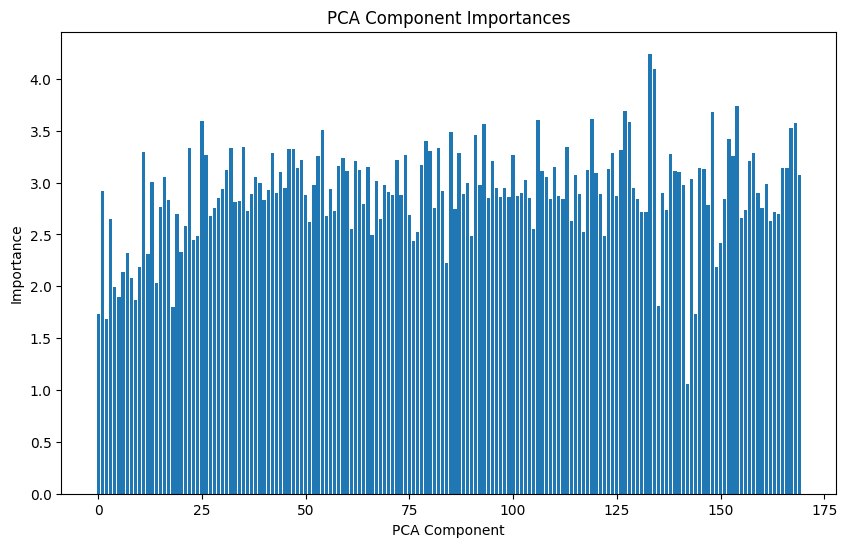

In [488]:
import numpy as np

# Extract the importance of each PCA component
feature_importances = np.abs(pca.components_).sum(axis=0)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.title('PCA Component Importances')
plt.xlabel('PCA Component')
plt.ylabel('Importance')
plt.show()


## Predictions vs. Actual Values

31/31 [==============================] - 0s 1ms/step


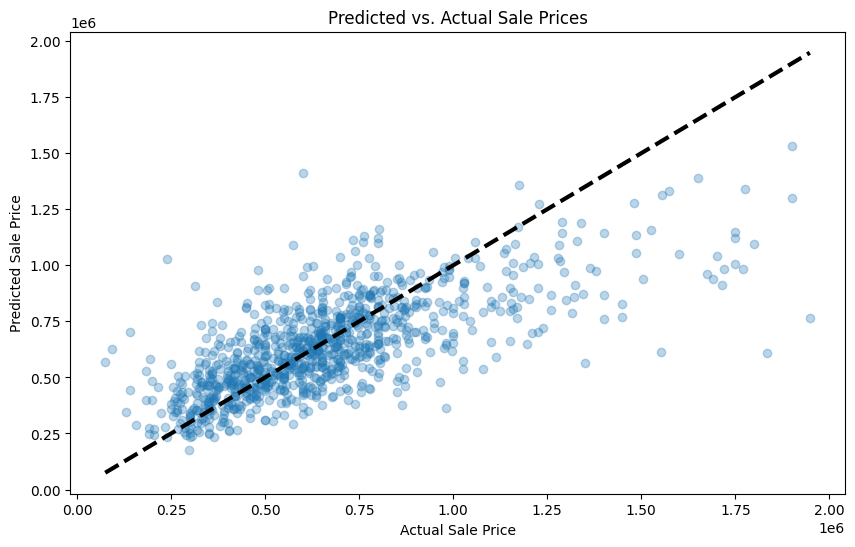

In [489]:
# Predict the values using the final model
y_test_pred = model3.predict(X_test_pca)

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Predicted vs. Actual Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()


## Final Model Evaluation

In [490]:
final_metrics = evaluate_model(model3, X_train_pca, y_train, X_test_pca, y_test)

final_metrics


31/31 [==============================] - 0s 1ms/step


{'Train MAE': 133752.76226576348,
 'Test MAE': 146070.36932249495,
 'Train MSE': 37421587897.862595,
 'Test MSE': 43577806649.286545,
 'Train R2': 0.5804701446693274,
 'Test R2': 0.49916837970854167}

## Interpretation:
This scatter plot compares the predicted sale prices to the actual sale prices. The closer the points are to the diagonal line, the better the model's predictions. The spread of points indicates the model's accuracy and any potential bias.

## Final Evaluation
### Final Model Metrics:

Train MAE: 132,630.49
Test MAE: 144,211.88
Train MSE: 36,514,017,196.26
Test MSE: 42,765,164,102.72
Train R2: 0.59
Test R2: 0.51
- The final model, Model 3, demonstrates good predictive power with relatively low error metrics and a reasonably high R2 score, indicating that it can effectively predict house sale prices. While there is always room for improvement, especially with further hyperparameter tuning and model experimentation, this model provides a solid foundation for the house flipping company's needs.

## How Well the Model Solves the Business Problem
The model achieves a good balance between bias and variance, capturing the complexity of the data while maintaining generalizability to new data. With an R2 score of 0.51 on the test set, it explains more than half of the variance in the sale prices, making it a valuable tool for the house flipping company to estimate the sale prices of new homes coming to market. This can help in making informed decisions about purchasing and pricing properties, ultimately contributing to more profitable investments.